# Reaching Further

Since the discovery of the fast heuristic to predict high-accuracy feature sets for KNN, I have reached further into the possible feature sets and simulated several.  This notebook simply takes those simulations and plots them.  These are plots of actual simulation results from resampling 10,000 times on feature sets suggested by the heuristic.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plotAccuracies(accuracies, p = 21/26, n = 10000, z = 3.265,
                  title = "Average Accuracy of Fridge Locations by KNN Classifier",
                  allLabels = False, best = True, moderate = True, worst = False,
                  a = 0.1,legendoffset = False):
    error = z*np.sqrt(p*(1-p)/n)
    X = np.linspace(1,len(accuracies[0][1]),num=3)
    YNaive = [21/26 for x in X]
    YNaiveLow = [y - error for y in YNaive]
    YNaiveHi = [y + error for y in YNaive]

    fig, ax = plt.subplots(figsize = (9,6))
    ax.plot(X,YNaive,color = 'blue', label = 'Always No Fridge Classifier')
    ax.plot(X,YNaiveLow, color = 'grey',alpha = 0.25, label = '99% Confidence Interval')
    ax.plot(X,YNaiveHi, color = 'grey',alpha = 0.25)

    ax.fill_between(X, YNaiveLow, YNaiveHi,color = 'grey',alpha = 0.25)
    ax.set_xlabel("K value for KNN")
    ax.set_ylabel("Average Accuracy Over "+str(n)+" Trials")
    ax.set_title(title)
    
    if allLabels == True:
        for tup in accuracies:
            ax.plot(np.arange(1,len(tup[1])+1),tup[1],label = tup[0])
    else:
        for tup in accuracies:
            if max(tup[1])>21/26+error and best == True:
                ax.plot(np.arange(1,len(tup[1])+1),tup[1],label = tup[0])
            elif max(tup[1])>21/26 and moderate == True:
                ax.plot(np.arange(1,len(tup[1])+1),tup[1],color = 'orange',alpha= a)
            elif worst == True:
                ax.plot(np.arange(1,len(tup[1])+1),tup[1],color = 'purple',alpha= a/2)  
    plt.ylim([0.6,.9])
    
    if legendoffset:
        ax.legend(loc = 'center left',bbox_to_anchor=(1, 0.5))
    else:
        plt.legend()
    return fig

### Three-Feature Sets
Many of these were undiscovered prior to the heuristic.  Only 1964 of the 6545 possible three-feature sets were tested before.

In [3]:
heurTriples = [[['walk_score', 'white_popl', 'other_popl']  ,  [0.6999179, 0.8174272, 0.818351, 0.8059927, 0.784522]],
            [['walk_score', 'other_popl', 'educational_attainment_very_advanced_degrees']  ,  [0.7803885, 0.8473361, 0.7990242, 0.799056,  0.7593412]],
            [['bike_score', 'population_density', 'household_income']  ,  [0.7387561, 0.8167956, 0.8526018, 0.8241479, 0.8241479]],
            [['bike_score', 'asian_popl', 'household_type_one_person_count']  ,  [0.8457653, 0.8061419, 0.7946827, 0.8052076, 0.7969077]],
            [['population', 'marital_status_widowed', 'household_type_other_non_family_count']  ,  [0.8443733, 0.8002548, 0.7667632, 0.8065206, 0.8059542]],
            [['population', 'marital_status_widowed', 'Age_18_to_21']  ,  [0.8454416, 0.8010574, 0.7698137, 0.8079213, 0.8074547]],
            [['population', 'white_popl', 'household_type_single_male_count']  ,  [0.7427547, 0.7878325, 0.8231706, 0.7787627, 0.7542635]],
            [['population', 'hispanic_popl', 'other_popl']  ,  [0.8294672, 0.8040735, 0.7922982, 0.8053234, 0.8052901]],
            [['population', 'other_popl', 'household_type_married_count']  ,  [0.85029,   0.8312044, 0.8133806, 0.7996886, 0.7830116]],
            [['population', 'other_popl', 'household_type_single_male_count']  ,  [0.7670704, 0.8428183, 0.7948488, 0.7847426, 0.7725692]],
            [['population_density', 'household_income', 'Age_80_older']  ,  [0.8504127, 0.8084736, 0.8043608, 0.8063943, 0.7951943]],
            [['population_density', 'white_popl', 'other_popl']  ,  [0.8584701, 0.7827316, 0.7588721, 0.8020749, 0.78696  ]],
            [['population_density', 'white_popl', 'educational_attainment_very_advanced_degrees']  ,  [0.8271504, 0.7897453, 0.6889843, 0.7985066, 0.768624 ]],
            [['population_density', 'asian_popl', 'educational_attainment_very_advanced_degrees']  ,  [0.826055,  0.7753723, 0.6399687, 0.7974891, 0.77131  ]],
            [['population_density', 'other_popl', 'educational_attainment_no_hs']  ,  [0.8277199, 0.8021231, 0.7775936, 0.8051698, 0.793326 ]],
            [['population_density', 'other_popl', 'educational_attainment_very_advanced_degrees']  ,  [0.8912237, 0.844276,  0.7925691, 0.8115027, 0.8034823]],
            [['population_density', 'other_popl', 'household_type_married_count']  ,  [0.7739247, 0.8352539, 0.8407369, 0.7984579, 0.7805339]],
            [['population_density', 'other_popl', 'Age_80_older']  ,  [0.8475334, 0.8319539, 0.8164696, 0.80574,   0.804411 ]],
            [['population_density', 'food_stamps_total', 'educational_attainment_no_hs']  ,  [0.8466322, 0.8070339, 0.7982031, 0.8079839, 0.8079839]],
            [['population_density', 'educational_attainment_no_hs', 'household_type_single_male_count']  ,  [0.8159508, 0.8036887, 0.7834529, 0.8089546, 0.8085547]],
            [['marital_status_married', 'marital_status_never_married', 'other_popl']  ,  [0.8250756, 0.8290886, 0.8134171, 0.8022424, 0.7838507]],
            [['marital_status_married', 'other_popl', 'household_type_single_female_count']  ,  [0.8496847, 0.8063242, 0.7979264, 0.8066577, 0.8059078]],
            [['marital_status_married', 'other_popl', 'household_type_single_male_count']  ,  [0.7887616, 0.8470818, 0.8138456, 0.7838944, 0.7659399]],
            [['marital_status_married', 'other_popl', 'household_type_with_children']  ,  [0.838163,  0.8065067, 0.7996755, 0.8063396, 0.8023395]],
            [['marital_status_married', 'Age_30_to_39', 'Age_80_older']  ,  [0.7079336, 0.8301083, 0.7107742, 0.7719655, 0.7329018]],
            [['marital_status_separated_divorce', 'marital_status_widowed', 'hispanic_popl']  ,  [0.764464,  0.817202,  0.8243664, 0.8004826, 0.7889685]],
            [['marital_status_widowed', 'Age_18_to_21', 'Age_80_older']  ,  [0.8341002, 0.7632695, 0.6774489, 0.7755037, 0.7316924]],
            [['marital_status_never_married', 'white_popl', 'Age_80_older']  ,  [0.7568169, 0.8362101, 0.7524716, 0.7745693, 0.7395505]],
            [['marital_status_never_married', 'other_popl', 'household_type_married_count']  ,  [0.8360539, 0.8293527, 0.8017588, 0.7977389, 0.7762499]],
            [['marital_status_never_married', 'Age_18_to_21', 'Age_80_older']  ,  [0.7640632, 0.8442637, 0.7782775, 0.7485917, 0.7134267]],
            [['marital_status_never_married', 'Age_22_to_29', 'Age_80_older']  ,  [0.8074706, 0.8353064, 0.7423756, 0.7550657, 0.7238299]],
            [['white_popl', 'mixed_popl', 'household_type_single_male_count']  ,  [0.8318412, 0.8224497, 0.8134625, 0.7738329, 0.7424313]],
            [['white_popl', 'other_popl', 'household_type_with_children']  ,  [0.8427788, 0.8074047, 0.8013734, 0.8071045, 0.8020719]],
            [['hispanic_popl', 'other_popl', 'household_type_single_female_count']  ,  [0.8462194, 0.8081174, 0.8001029, 0.808717,  0.8077666]],
            [['hispanic_popl', 'other_popl', 'household_type_single_male_count']  ,  [0.8255421, 0.8000422, 0.7712371, 0.7883555, 0.7847931]],
            [['mixed_popl', 'other_popl', 'household_type_married_count']  ,  [0.8441674, 0.8069021, 0.7984076, 0.7958874, 0.7683183]],
            [['mixed_popl', 'educational_attainment_bachelors', 'Age_80_older']  ,  [0.7483409, 0.8219804, 0.6810181, 0.7315643, 0.7017803]],
            [['other_popl', 'household_type_married_count', 'household_type_single_female_count']  ,  [0.8464727, 0.8076054, 0.7993568, 0.8079889, 0.8076219]],
            [['other_popl', 'household_type_married_count', 'household_type_single_male_count']  ,  [0.787513,  0.8473322, 0.8008583, 0.7876114, 0.7696916]],
            [['other_popl', 'household_type_married_count', 'household_type_with_children']  ,  [0.845465,  0.8057253, 0.7969972, 0.8062081, 0.8048413]],
            [['other_popl', 'household_type_single_female_count', 'Age_18_to_21']  ,  [0.8414766, 0.8027886, 0.7825185, 0.8082686, 0.8081351]],
            [['other_popl', 'household_type_single_female_count', 'Age_40_to_49']  ,  [0.833911,  0.8091326, 0.8023687, 0.8094491, 0.8094158]],
            [['other_popl', 'household_type_single_male_count', 'Age_18_to_21']  ,  [0.7775325, 0.845516,  0.8090843, 0.7842914, 0.7723488]],
            [['other_popl', 'household_type_single_male_count', 'Age_30_to_39']  ,  [0.7619359, 0.8423534, 0.7868845, 0.7857086, 0.7729505]],
            [['other_popl', 'household_type_single_male_count', 'Age_40_to_49']  ,  [0.7445191, 0.8434201, 0.7885834, 0.7787161, 0.758094 ]],
            [['household_type_other_non_family_count', 'Age_18_to_21', 'Age_80_older']  ,  [0.6959113, 0.8412378, 0.7618228, 0.7858731, 0.7360862]],
            [['household_type_other_non_family_count', 'Age_22_to_29', 'Age_80_older']  ,  [0.6798174, 0.8449128, 0.696554,  0.7548654, 0.7194767]]]

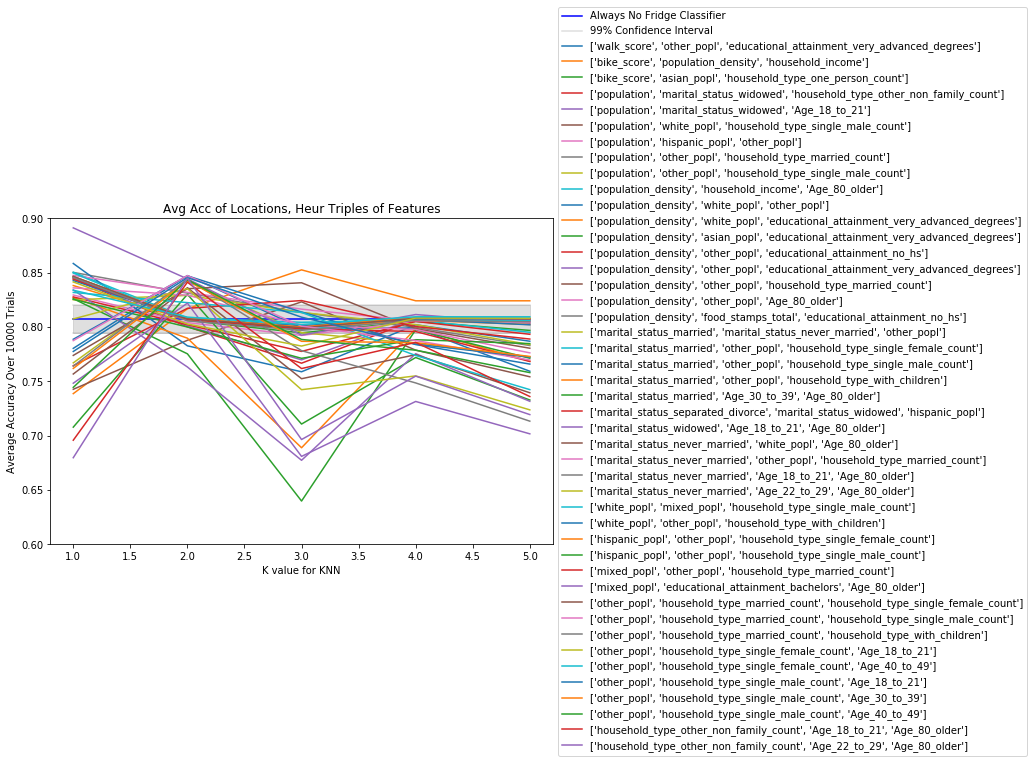

In [4]:
plotHeurThreeFeatures = plotAccuracies(heurTriples, moderate = False, title = "Avg Acc of Locations, Heur Triples of Features",legendoffset = True)
#plotHeurThreeFeatures.savefig("heurThreeFeat.png")

### Four-Feature Sets
All of these were undiscovered prior to the heuristic.  Note also that nine of these (counting multiples for different k-values) outperform the best feature-set discovered prior.  These were suggested from the heuristic inspecting all 52,360 four-feature sets possible.

In [5]:
bestHeurFour = [[['population', 'marital_status_widowed', 'household_type_other_non_family_count', 'Age_18_to_21']  ,  [0.8751364, 0.8006425, 0.7706649, 0.8071058, 0.806389 ]],
[['population_density', 'asian_popl', 'other_popl', 'educational_attainment_very_advanced_degrees']  ,  [0.8821157, 0.8208687, 0.782172,  0.8223102, 0.800449 ]],
[['population_density', 'other_popl', 'educational_attainment_very_advanced_degrees', 'household_type_single_male_count']  ,  [0.8684905, 0.8702796, 0.8242167, 0.774959,  0.7394808]],
[['population_density', 'other_popl', 'educational_attainment_very_advanced_degrees', 'Age_18_to_21']  ,  [0.8901078, 0.8456081, 0.7913026, 0.81371,   0.8071393]],
[['marital_status_married', 'mixed_popl', 'other_popl', 'Age_18_to_21']  ,  [0.8622299, 0.8252584, 0.7879649, 0.7897151, 0.7578321]],
[['marital_status_widowed', 'Age_18_to_21', 'Age_22_to_29', 'Age_80_older']  ,  [0.8526322, 0.7907026, 0.7251389, 0.806707,  0.803891 ]],
[['marital_status_never_married', 'white_popl', 'Age_18_to_21', 'Age_80_older']  ,  [0.8134037, 0.8627699, 0.7758549, 0.773448,  0.7289684]],
[['marital_status_never_married', 'Age_18_to_21', 'Age_22_to_29', 'Age_80_older']  ,  [0.8571086, 0.8590475, 0.7608463, 0.7632904, 0.735192 ]],
[['mixed_popl', 'educational_attainment_bachelors', 'Age_18_to_21', 'Age_80_older']  ,  [0.7561328, 0.8432507, 0.6872153, 0.7257934, 0.691899 ]]]

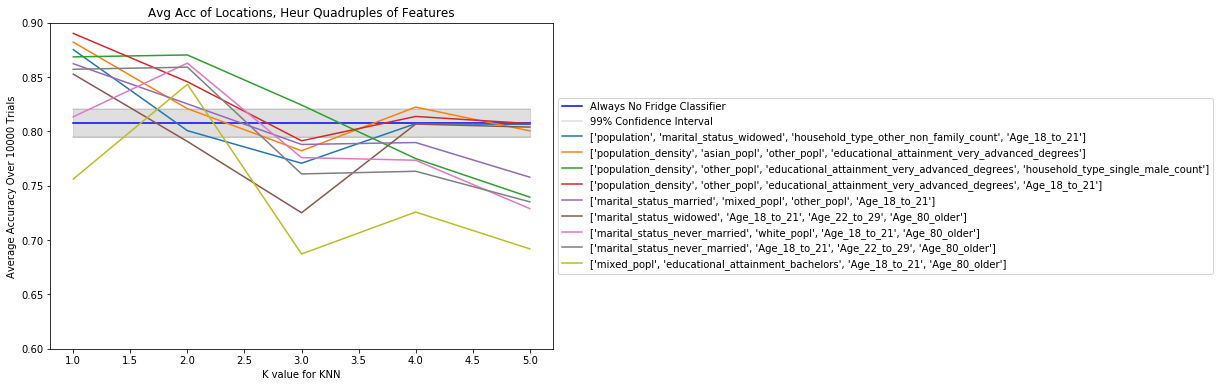

In [6]:
plotHeurFourFeatures = plotAccuracies(bestHeurFour, moderate = False, title = "Avg Acc of Locations, Heur Quadruples of Features",legendoffset = True)
#plotHeurFourFeatures.savefig("heurFourFeat.png")

### Five-Feature Sets
All of these were undiscovered prior to the heuristic.  Note that the previous best classify prior to the heuristic scored a little above 0.85. These were suggested from the heuristic inspecting all 324,632 five-feature sets possible.

In [7]:
heurFiveFeat = [[['transit_score','marital_status_married','hispanic_popl','other_popl','household_type_single_female_count'],[0.8788005,0.8006637,0.7620105,0.8075767,0.8068931]],
[['bike_score','population_density','other_popl','educational_attainment_very_advanced_degrees','household_type_single_male_count'],[0.8504918,0.8434005,0.8780055,0.8075057,0.7989717]],
[['bike_score','population_density','other_popl','household_type_married_count','household_type_single_male_count'],[0.8657361,0.8443535,0.8669588,0.8055041,0.788274,]],
[['bike_score','population_density','other_popl','household_type_married_count','household_type_one_person_count'],[0.9040723,0.8339667,0.8357331,0.8092873,0.8063355]],
[['bike_score','population_density','other_popl','household_type_married_count','Age_30_to_39'],[0.8901577,0.8334973,0.8324299,0.8096012,0.8072336]],
[['bike_score','population_density','educational_attainment_very_advanced_degrees','household_type_single_male_count','Age_50_to_59'],[0.8842004,0.8386664,0.8522127,0.808005,0.8004358]],
[['bike_score','marital_status_married','household_type_one_person_count','household_type_other_non_family_count','Age_22_to_29'],[0.8618092,0.8062523,0.7956459,0.8051352,0.7959895]],
[['bike_score','marital_status_married','household_type_one_person_count','Age_18_to_21','Age_22_to_29'],[0.8642199,0.8058391,0.7958956,0.8043548,0.7953055]],
[['bike_score','marital_status_never_married','asian_popl','household_type_one_person_count','Age_22_to_29'],[0.8645352,0.8027757,0.7695365,0.8012566,0.789962,]],
[['bike_score','household_type_married_count','household_type_one_person_count','household_type_other_non_family_count','Age_22_to_29'],[0.8618412,0.8060526,0.7939433,0.804452,0.7944717]],
[['population','population_density','black_popl','other_popl','educational_attainment_very_advanced_degrees'],[0.8968329,0.8530654,0.8370386,0.8003905,0.7773691]],
[['population','population_density','black_popl','other_popl','household_type_married_count'],[0.8938856,0.8369339,0.834068,0.8016034,0.7832457]],
[['population','population_density','mixed_popl','other_popl','educational_attainment_very_advanced_degrees'],[0.8738742,0.8602486,0.8591987,0.8019794,0.7736593]],
[['population','population_density','other_popl','educational_attainment_very_advanced_degrees','household_type_single_male_count'],[0.8708405,0.8718636,0.8249959,0.7769005,0.7469197]],
[['population','population_density','other_popl','Age_30_to_39','Age_80_older'],[0.876443,0.8583033,0.8492233,0.8044576,0.7917454]],
[['population_density','marital_status_married','marital_status_never_married','black_popl','other_popl'],[0.8853134,0.8105436,0.8192969,0.7981722,0.7775814]],
[['population_density','marital_status_married','white_popl','black_popl','other_popl'],[0.8892781,0.8151195,0.8197963,0.8026502,0.7830745]],
[['population_density','marital_status_married','hispanic_popl','other_popl','household_type_single_male_count'],[0.8753645,0.818011,0.767386,0.7906393,0.7570475]],
[['population_density','marital_status_married','black_popl','other_popl','educational_attainment_bachelors'],[0.8878648,0.8144594,0.8219288,0.8016536,0.782728,]],
[['population_density','marital_status_married','black_popl','other_popl','educational_attainment_very_advanced_degrees'],[0.9040028,0.855782,0.8351732,0.7987862,0.7716829]],
[['population_density','marital_status_married','black_popl','other_popl','household_type_other_non_family_count'],[0.8838629,0.8099266,0.8150698,0.7967386,0.7758856]],
[['population_density','marital_status_married','black_popl','other_popl','Age_80_older'],[0.9002665,0.8526309,0.8311414,0.8060337,0.7873565]],
[['population_density','marital_status_married','other_popl','educational_attainment_bachelors','household_type_single_male_count'],[0.9009108,0.8721156,0.8197169,0.7795008,0.751517,]],
[['population_density','marital_status_married','other_popl','educational_attainment_very_advanced_degrees','household_type_single_male_count'],[0.9036895,0.8699123,0.8222367,0.7756054,0.7464738]],
[['population_density','marital_status_never_married','black_popl','other_popl','educational_attainment_very_advanced_degrees'],[0.897302,0.8525491,0.8372024,0.79816,0.7707904]],
[['population_density','marital_status_never_married','black_popl','other_popl','household_type_married_count'],[0.8910063,0.8339683,0.8325376,0.7989721,0.7801162]],
[['population_density','marital_status_never_married','other_popl','educational_attainment_bachelors','household_type_single_male_count'],[0.879119,0.8462366,0.7922147,0.7702749,0.7356498]],
[['population_density','marital_status_never_married','other_popl','educational_attainment_very_advanced_degrees','household_type_single_male_count'],[0.87089,0.8734464,0.82818,0.777218,0.7428906]],
[['population_density','white_popl','asian_popl','other_popl','educational_attainment_very_advanced_degrees'],[0.8773119,0.8324086,0.7889017,0.8246881,0.8017123]],
[['population_density','white_popl','other_popl','educational_attainment_bachelors','household_type_single_male_count'],[0.8558533,0.8660106,0.8026088,0.7744055,0.7417391]],
[['population_density','white_popl','other_popl','educational_attainment_very_advanced_degrees','household_type_single_male_count'],[0.868125,0.8703964,0.8227184,0.7762526,0.7462545]],
[['population_density','white_popl','other_popl','educational_attainment_very_advanced_degrees','Age_18_to_21'],[0.8885687,0.842478,0.78293,0.8244192,0.8034749]],
[['population_density','hispanic_popl','black_popl','other_popl','educational_attainment_very_advanced_degrees'],[0.885574,0.8354193,0.8389346,0.8037049,0.783712]],
[['population_density','hispanic_popl','black_popl','other_popl','household_type_married_count'],[0.8842013,0.8066886,0.7961988,0.7988368,0.7809446]],
[['population_density','hispanic_popl','other_popl','educational_attainment_very_advanced_degrees','household_type_with_children'],[0.8955062,0.8083195,0.8010123,0.8063023,0.7931547]],
[['population_density','hispanic_popl','other_popl','household_type_married_count','household_type_single_male_count'],[0.8782611,0.8314883,0.8106019,0.7969704,0.7676378]],
[['population_density','black_popl','mixed_popl','other_popl','educational_attainment_very_advanced_degrees'],[0.8969174,0.8544452,0.8376187,0.8024537,0.7733503]],
[['population_density','black_popl','mixed_popl','other_popl','household_type_married_count'],[0.8919837,0.8351172,0.8303033,0.799139,0.7790831]],
[['population_density','black_popl','other_popl','educational_attainment_bachelors','household_type_married_count'],[0.8978204,0.838562,0.8381668,0.8016,0.7832925]],
[['population_density','black_popl','other_popl','educational_attainment_very_advanced_degrees','household_type_married_count'],[0.903752,0.8543708,0.843537,0.802858,0.7814812]],
[['population_density','black_popl','other_popl','educational_attainment_very_advanced_degrees','household_type_with_children'],[0.8780105,0.8055417,0.7956819,0.8036579,0.7895964]],
[['population_density','black_popl','other_popl','household_type_married_count','household_type_single_male_count'],[0.8745052,0.8265414,0.8064846,0.780452,0.7594]],
[['population_density','black_popl','other_popl','household_type_married_count','Age_22_to_29'],[0.8904838,0.8351856,0.8326871,0.7997208,0.7804126]],
[['population_density','black_popl','other_popl','household_type_married_count','Age_80_older'],[0.8988843,0.8503481,0.8311547,0.8034232,0.7870462]],
[['population_density','black_popl','other_popl','Age_40_to_49','Age_80_older'],[0.893067,0.8259023,0.8122501,0.8027198,0.7859262]],
[['population_density','asian_popl','other_popl','educational_attainment_bachelors','educational_attainment_very_advanced_degrees'],[0.8894873,0.8531047,0.7886467,0.825355,0.8035258]],
[['population_density','asian_popl','other_popl','educational_attainment_bachelors','household_type_single_male_count'],[0.8782543,0.8710646,0.8165182,0.7766514,0.7456842]],
[['population_density','asian_popl','other_popl','educational_attainment_very_advanced_degrees','household_type_single_male_count'],[0.8891824,0.871495,0.8246149,0.7775044,0.7446585]],
[['population_density','asian_popl','other_popl','educational_attainment_very_advanced_degrees','household_type_other_non_family_count'],[0.8765177,0.81819,0.7670882,0.8099212,0.7929637]],
[['population_density','asian_popl','other_popl','educational_attainment_very_advanced_degrees','Age_18_to_21'],[0.8819533,0.8219009,0.7774953,0.8238899,0.8037436]],
[['population_density','mixed_popl','other_popl','educational_attainment_very_advanced_degrees','household_type_single_male_count'],[0.8751412,0.8725646,0.8219868,0.774521,0.7345818]],
[['population_density','mixed_popl','other_popl','educational_attainment_very_advanced_degrees','household_type_with_children'],[0.8855512,0.8323227,0.8278939,0.8058039,0.7903241]],
[['population_density','other_popl','educational_attainment_bachelors','educational_attainment_very_advanced_degrees','household_type_single_male_count'],[0.8691407,0.8723265,0.8276094,0.7777844,0.7531989]],
[['population_density','other_popl','educational_attainment_bachelors','household_type_married_count','household_type_single_male_count'],[0.874545,0.8702428,0.8183337,0.7766557,0.753403]],
[['population_density','other_popl','educational_attainment_bachelors','household_type_single_male_count','Age_30_to_39'],[0.8578855,0.8657629,0.7916305,0.7706205,0.7353436]],
[['population_density','other_popl','educational_attainment_very_advanced_degrees','household_type_married_count','household_type_single_male_count'],[0.9036705,0.8713268,0.8261968,0.7768885,0.7542541]],
[['population_density','other_popl','educational_attainment_very_advanced_degrees','household_type_single_male_count','household_type_other_non_family_count'],[0.8678578,0.8729312,0.8264793,0.7773866,0.7444389]],
[['population_density','other_popl','educational_attainment_very_advanced_degrees','household_type_single_male_count','Age_18_to_21'],[0.8681147,0.8737314,0.8259453,0.7780763,0.7451455]],
[['population_density','other_popl','educational_attainment_very_advanced_degrees','household_type_single_male_count','Age_22_to_29'],[0.8692772,0.873595,0.8260789,0.776666,0.7417883]],
[['population_density','other_popl','educational_attainment_very_advanced_degrees','household_type_single_male_count','Age_30_to_39'],[0.8617114,0.8718765,0.8227646,0.7743552,0.7395443]],
[['population_density','other_popl','educational_attainment_very_advanced_degrees','household_type_with_children','Age_40_to_49'],[0.8862925,0.8145394,0.8310702,0.8064539,0.7949055]],
[['population_density','other_popl','Age_30_to_39','Age_40_to_49','Age_80_older'],[0.8397866,0.8578346,0.8428732,0.7915956,0.7690875]],
[['marital_status_never_married','white_popl','other_popl','household_type_married_count','household_type_other_non_family_count'],[0.8668153,0.8152121,0.7436861,0.786612,0.7720547]],
[['marital_status_never_married','white_popl','educational_attainment_bachelors','Age_18_to_21','Age_80_older'],[0.7445095,0.8604054,0.7648805,0.7669602,0.7158255]],
[['marital_status_never_married','white_popl','Age_18_to_21','Age_22_to_29','Age_80_older'],[0.8500587,0.8528016,0.7400736,0.7660741,0.7218953]],
[['marital_status_never_married','mixed_popl','educational_attainment_bachelors','Age_18_to_21','Age_80_older'],[0.7302323,0.8429989,0.6863656,0.7251804,0.6922349]],
[['marital_status_never_married','other_popl','educational_attainment_bachelors','household_type_married_count','household_type_other_non_family_count'],[0.8714146,0.8133358,0.7384923,0.7975107,0.7710895]],
[['marital_status_never_married','other_popl','household_type_married_count','household_type_other_non_family_count','Age_22_to_29'],[0.8637681,0.8193093,0.7749142,0.8033371,0.7858949]],
[['marital_status_never_married','educational_attainment_bachelors','household_type_other_non_family_count','Age_18_to_21','Age_80_older'],[0.7546131,0.8652728,0.7780618,0.7715168,0.7228069]],
[['marital_status_never_married','educational_attainment_bachelors','Age_18_to_21','Age_22_to_29','Age_80_older'],[0.7951748,0.8545565,0.7487369,0.7713041,0.7241794]],
[['white_popl','mixed_popl','educational_attainment_bachelors','Age_18_to_21','Age_80_older'],[0.7727827,0.8414911,0.6807779,0.7258444,0.691499]],
[['mixed_popl','educational_attainment_bachelors','Age_18_to_21','Age_22_to_29','Age_80_older'],[0.7650799,0.840836,0.6813559,0.7319141,0.7065937]]]

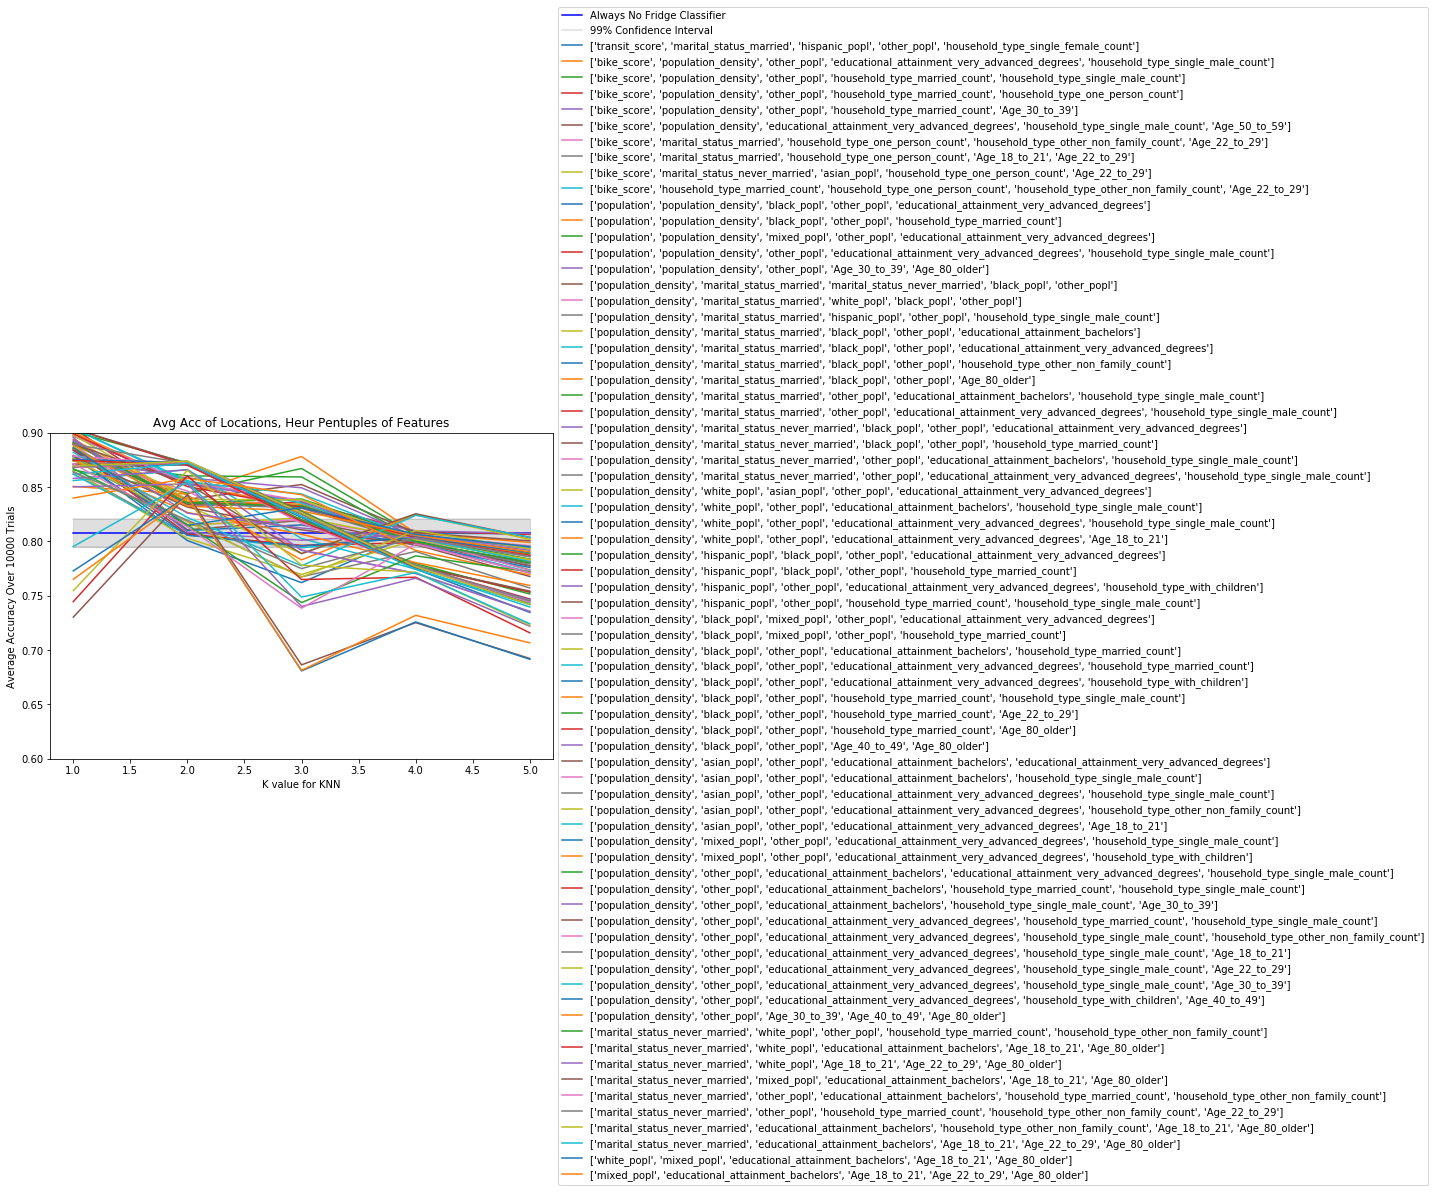

In [8]:
plotHeurFiveFeatures = plotAccuracies(heurFiveFeat, moderate = False, title = "Avg Acc of Locations, Heur Pentuples of Features",legendoffset = True)
#plotHeurFiveFeatures.savefig("heurFiveFeat.png")